# **Import libs**

In [1]:
%%capture
!pip install scikit-plot
!pip3 install imblearn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, auc
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

sns.set_style('dark')

# **Download dataset**

In [ ]:
!gdown https://github.com/SpikeLab-CL/challenge_watershed/blob/main/flux.csv.zip

In [ ]:
!unzip /content/flux.zip

# **EDA**

In [ ]:
df = pd.read_csv("/content/flux/flux.csv")

In [ ]:
#View shape
df.shape

(4180480, 10)

In [ ]:
#View the data (FIRST OBSERVATIONS)
df.head()

date  basin_id   flux  precip   temp_max                 gauge_name  \
0  1980-01-01   1001001  0.579     0.0  10.685653  Rio Caquena En Nacimiento   
1  1980-01-02   1001001  0.543     0.0  11.470960  Rio Caquena En Nacimiento   
2  1980-01-03   1001001  0.482     0.0  11.947457  Rio Caquena En Nacimiento   
3  1980-01-04   1001001  0.459     0.0  12.424489  Rio Caquena En Nacimiento   
4  1980-01-05   1001001  0.436     0.0  12.649203  Rio Caquena En Nacimiento   

       lat      lon    mean_elev   area_km2  
0 -18.0769 -69.1961  4842.449328  49.711859  
1 -18.0769 -69.1961  4842.449328  49.711859  
2 -18.0769 -69.1961  4842.449328  49.711859  
3 -18.0769 -69.1961  4842.449328  49.711859  
4 -18.0769 -69.1961  4842.449328  49.711859

In [ ]:
#View the data (LAST OBSERVATIONS)
df.tail()

date  basin_id   flux  precip  temp_max  \
4180475  2020-06-02  12930001  0.375     NaN       NaN   
4180476  2020-06-03  12930001  0.342     NaN       NaN   
4180477  2020-06-04  12930001  0.325     NaN       NaN   
4180478  2020-06-05  12930001  0.311     NaN       NaN   
4180479  2020-06-06  12930001  0.294     NaN       NaN   

                            gauge_name      lat      lon   mean_elev  \
4180475  Rio Robalo En Puerto Williams -54.9469 -67.6392  520.849289   
4180476  Rio Robalo En Puerto Williams -54.9469 -67.6392  520.849289   
4180477  Rio Robalo En Puerto Williams -54.9469 -67.6392  520.849289   
4180478  Rio Robalo En Puerto Williams -54.9469 -67.6392  520.849289   
4180479  Rio Robalo En Puerto Williams -54.9469 -67.6392  520.849289   

          area_km2  
4180475  20.645617  
4180476  20.645617  
4180477  20.645617  
4180478  20.645617  
4180479  20.645617

In [ ]:
#Basic information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180480 entries, 0 to 4180479
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   date        object 
 1   basin_id    int64  
 2   flux        float64
 3   precip      float64
 4   temp_max    float64
 5   gauge_name  object 
 6   lat         float64
 7   lon         float64
 8   mean_elev   float64
 9   area_km2    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 318.9+ MB


In [ ]:
#Describe the data

df.describe()

basin_id          flux        precip      temp_max           lat  \
count  4.180480e+06  4.180480e+06  4.175037e+06  4.175037e+06  4.180480e+06   
mean   7.179757e+06  5.253340e+01  2.947445e+00  1.365728e+01 -3.569572e+01   
std    3.180965e+06  1.676027e+02  8.766749e+00  6.615037e+00  8.047659e+00   
min    1.001001e+06  0.000000e+00  0.000000e+00 -1.160359e+01 -5.494690e+01   
25%    4.558001e+06  8.680000e-01  0.000000e+00  9.162867e+00 -3.915000e+01   
50%    7.350003e+06  5.171000e+00  0.000000e+00  1.321396e+01 -3.588420e+01   
75%    9.416001e+06  2.990000e+01  6.422626e-01  1.805745e+01 -3.126560e+01   
max    1.293000e+07  1.580500e+04  2.132120e+02  4.081117e+01 -1.784280e+01   

                lon     mean_elev      area_km2  
count  4.180480e+06  4.180480e+06  4.180480e+06  
mean  -7.129595e+01  1.760129e+03  2.404876e+03  
std    1.254339e+00  1.382121e+03  4.322051e+03  
min   -7.366670e+01  1.181229e+02  1.789123e+01  
25%   -7.231670e+01  5.847012e+02  3.761001e+02  
50%   -7.137190e+01  1.195311e+03  8.205541e+02  
75%   -7.050670e+01  3.048161e+03  2.461610e+03  
max   -6.763920e+01  4.910152e+03  5.224367e+04

In [ ]:
#View numbers of NaN
df.isna().sum()

date             0
basin_id         0
flux             0
precip        5443
temp_max      5443
gauge_name       0
lat              0
lon              0
mean_elev        0
area_km2         0
dtype: int64

In [ ]:
#Drop observations with NaN (there are few values so we can drop)
df = df.dropna()

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
#Find the duplicates

df.duplicated().sum()

0

In [ ]:
df.columns

Index(['date', 'basin_id', 'flux', 'precip', 'temp_max', 'gauge_name', 'lat',
       'lon', 'mean_elev', 'area_km2'],
      dtype='object')

In [ ]:
#View unique values
unique_col = []
for col in df.columns:
  unique_col.append([col,len(df[col].unique())])

In [ ]:
unique_col

[['date', 14731],
 ['basin_id', 503],
 ['flux', 34205],
 ['precip', 1384281],
 ['temp_max', 3901982],
 ['gauge_name', 503],
 ['lat', 485],
 ['lon', 454],
 ['mean_elev', 500],
 ['area_km2', 500]]

In [ ]:
df['flux'].value_counts()

0.001      11291
0.002       9390
0.005       6623
0.100       6212
10.100      5829
           ...  
77.016         1
94.604         1
120.128        1
102.063        1
7.047          1
Name: flux, Length: 34205, dtype: int64

In [ ]:
df['basin_id'].value_counts()

5410002     14638
10134001    14617
4703002     14607
4320001     14602
9129002     14571
            ...  
6034001       328
8117001       302
4534001       195
5423002       195
10683002      175
Name: basin_id, Length: 503, dtype: int64

In [ ]:
df['gauge_name'].value_counts()

Rio Aconcagua En Chacabuquito                   14638
Rio Cruces En Rucaco                            14617
Rio Choapa En Cuncumen                          14607
Rio Elqui En Algarrobal                         14602
Rio Cautin En Cajon                             14571
                                                ...  
Estero Chimbarongo En Santa Cruz                  328
Rio Chillan En Longitudinal                       302
Rio Pama Entrada Embalse Cogoti                   195
Estero Las Vegas Aguas Abajo Canal Las Vegas      195
Rio Blanco En Chaiten                             175
Name: gauge_name, Length: 503, dtype: int64

gauge_name is associated with basin_id

In [ ]:
#Pearson Correlation
df.corr(method='pearson')


basin_id      flux    precip  temp_max       lat       lon  \
basin_id   1.000000  0.218240  0.154384  0.024728 -0.972365 -0.715169   
flux       0.218240  1.000000  0.157168 -0.065097 -0.180506 -0.258978   
precip     0.154384  0.157168  1.000000 -0.167713 -0.114745 -0.174026   
temp_max   0.024728 -0.065097 -0.167713  1.000000  0.028275 -0.276995   
lat       -0.972365 -0.180506 -0.114745  0.028275  1.000000  0.621655   
lon       -0.715169 -0.258978 -0.174026 -0.276995  0.621655  1.000000   
mean_elev -0.839035 -0.172210 -0.153925 -0.339706  0.785573  0.818343   
area_km2  -0.081630  0.422901 -0.030863  0.049079  0.081472 -0.021812   

           mean_elev  area_km2  
basin_id   -0.839035 -0.081630  
flux       -0.172210  0.422901  
precip     -0.153925 -0.030863  
temp_max   -0.339706  0.049079  
lat         0.785573  0.081472  
lon         0.818343 -0.021812  
mean_elev   1.000000  0.049045  
area_km2    0.049045  1.000000

Lat, long and mean_elev have high negative correlation with basin_id



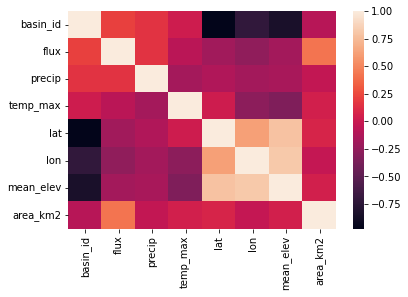

In [ ]:
#Correlation plot

sns.heatmap(df.corr(method='pearson'))

# **Plot flux, temperature and precipitations**

In [ ]:
def plot_one_timeserie(cod_station, variable, min_date, max_date):
  df_time = df[(df['date'] >= min_date) & (df['date'] <= max_date)][df['basin_id'] == cod_station]
  df_time.reset_index(drop=True,inplace=True)

 
  plt.plot(df_time['date'], df_time[variable])

  plt.xlabel("date")
  plt.ylabel(variable)

  plt.show()

In [ ]:
plot_one_timeserie(cod_station=1001001, variable='flux', min_date='1980-01-01', max_date='1980-01-10')

In [ ]:
def plot_three_timeseries(cod_station, min_date, max_date):
  df_time = df[(df['date'] >= min_date) & (df['date'] <= max_date)][df['basin_id'] == cod_station]
  df_time.reset_index(drop=True,inplace=True)

  df_variables = df_time[['flux', 'temp_max', 'precip']]
  d = preprocessing.normalize(df_variables)
  scaled_df = pd.DataFrame(d, columns=df_variables.columns)
  plt.plot(df_time['date'], scaled_df[['flux', 
         'temp_max',
         'precip']]);
  plt.legend(scaled_df[['flux', 
         'temp_max',
         'precip']]);
  plt.title('Plot of flux, temp_max and precip', size=15)

In [ ]:
plot_three_timeseries(cod_station=1001001, min_date='1980-01-01', max_date='1980-01-10')

# **Create three variables**

In [ ]:
gb = df.iloc[:].groupby('basin_id')

In [ ]:
datasets = []
for basin, df_gb in gb:
  flux_extreme = []
  print(basin)
  for index, row in df_gb.iterrows():
    if row['flux'] > df_gb['flux'].quantile(0.95):
      flux_extreme.append(1)
    else:
      flux_extreme.append(0)
  df_gb['flux_extreme'] = flux_extreme
  datasets.append(df_gb)

In [ ]:
df_extreme = pd.concat(datasets)
df_extreme.reset_index(drop=True,inplace=True)

In [ ]:
datasets = []
for basin, df_gb in gb:
  temp_extreme = []
  print(basin)
  for index, row in df_gb.iterrows():
    if row['temp_max'] > df_gb['temp_max'].quantile(0.95):
      temp_extreme.append(1)
    else:
      temp_extreme.append(0)
  df_gb['temp_extreme'] = temp_extreme
  datasets.append(df_gb)

In [ ]:
df_extreme = pd.concat(datasets)
df_extreme.reset_index(drop=True,inplace=True)

In [ ]:
datasets = []
for basin, df_gb in gb:
  precip_extreme = []
  print(basin)
  for index, row in df_gb.iterrows():
    if row['precip'] > df_gb['precip'].quantile(0.95):
      precip_extreme.append(1)
    else:
      precip_extreme.append(0)
  df_gb['precip_extreme'] = precip_extreme
  datasets.append(df_gb)

In [ ]:
df_extreme = pd.concat(datasets)
df_extreme.reset_index(drop=True,inplace=True)

I believe this to be an effective way of finding extreme values. Another idea would be to plot a blox-plot and analyze the outliers.

# **Plot the variable flux_extreme**

Text(0, 0.5, '')

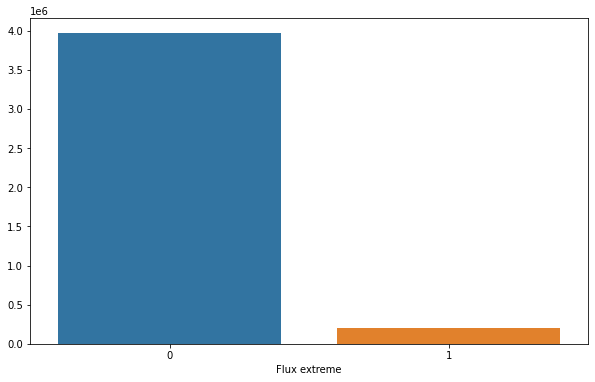

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='flux_extreme', data=df_extreme)
plt.xlabel('Flux extreme')
plt.ylabel('')

As we can see, the number of non-extreme values for the flux variable is much greater than the number of extreme values.

In [ ]:
def countX(lst, x): 
    count = 0
    for ele in lst: 
        if (ele == x): 
            count = count + 1
    return count 

In [ ]:
prop = []
for item in df_extreme['gauge_name'].unique():
  print(item)
  prop.append(countX(df_extreme[df_extreme['gauge_name'] == item]['flux_extreme'],0)/len(df_extreme[df_extreme['gauge_name'] == item]))

In [ ]:
prop_90 = []
for pro in prop:
  if pro >= 0.90:
    prop_90.append(pro)

In [ ]:
len(prop_90)

503

For all watersheds considered, the proportion of non-extreme values for the flux variable is high (greater than 0.90). Therefore, there are no different behaviors between the different watersheds.

# **Plot the percentage of extreme events during time**

In [ ]:
d = df_extreme[df_extreme['flux_extreme'] == 1]

In [ ]:
import plotly.express as px 
  
 
  
fig = px.histogram(d, x="date", histnorm='percent', title='Percentage of flux extreme events during time') 
fig.show()

As we can see, as of July 2017, extreme events related to water flow have become less frequent.

In [ ]:
d = df_extreme[df_extreme['temp_extreme'] == 1]

In [ ]:
import plotly.express as px 
  
 
  
fig = px.histogram(d, x="date", histnorm='percent', title='Percentage of temperature extreme events during time') 
fig.show()

As we can see, extreme temperature events tended to become more frequent from 2008 onwards, peaking in January to March 2015 and January to March 2016.

In [ ]:
d = df_extreme[df_extreme['precip_extreme'] == 1]

In [ ]:
import plotly.express as px 
  
 
  
fig = px.histogram(d, x="date", histnorm='percent', title='Percentage of average precipitation extreme events during time') 
fig.show()

Since June 2017, extreme average precipitation events have not shown a considerable increase in frequency.

# **Extreme flux prediction**

As pre-processing of the data for building the model, we transform the 'gauge_name' variable into dummy variables. Then we standardized the quantitative variables 'precip', 'temp_max', 'lat', 'lon', 'mean_elev' and 'area_km2'. We sort the data according to the 'date' variable and then remove the 'date' and 'basin_id' variables for model training.

In [5]:
df_extreme = df_extreme.sort_values(by='date')
df_extreme.reset_index(drop=True,inplace=True)

In [6]:
df_extreme_model = df_extreme.drop(columns=['date','basin_id','flux','gauge_name'])

In [7]:
class_data = df_extreme[['gauge_name']]
DataMatrix = pd.get_dummies(class_data)

In [10]:
data_standard = StandardScaler().fit_transform(df_extreme_model.iloc[:,:6])

In [12]:
df_standard = pd.DataFrame(data_standard, columns=df_extreme_model.iloc[:,:6].columns)
df = pd.concat([DataMatrix, df_standard,df_extreme_model.iloc[:,6:]], axis=1)

In [14]:
X = df.drop(['flux_extreme'],axis=1)
y = df['flux_extreme']

#### Split train test

In [15]:
X_train = X.loc[:int(0.7*len(df_extreme))]
y_train = y.loc[:int(0.7*len(df_extreme))]
X_test = X.loc[int(0.7*len(df_extreme)):]
y_test = y.loc[int(0.7*len(df_extreme)):]

We split the database into 70% of the first observations (ordered by date) in training and 30% for testing.

#### Under-sampling (to balance the dataset)

0    168286
1    168286
Name: flux_extreme, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


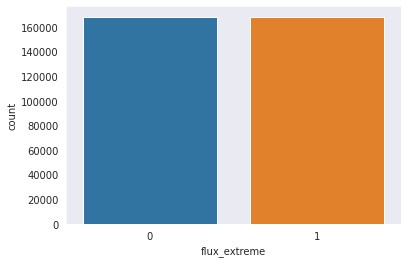

In [16]:
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_train, y_train)
print(pd.Series(y_res).value_counts())
sns.countplot(y_res)

As the training database is unbalanced, with the vast majority of observations classified as 0, we apply the under-sampling technique for unbalance.

#### Analysis of results for the test dataset for Logistic Regression and Random Forest Classifier

**Logistic Regression**

In [ ]:
model_res = LogisticRegression()
model_res.fit(X_res, y_res)

y_pred_res = model_res.predict(X_test)
y_proba_res = model_res.predict_proba(X_test)

In [18]:
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4))

print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))

print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_proba_res[:, 1])))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9734    0.6512    0.7803   1213312
           1     0.0400    0.4501    0.0735     39200

    accuracy                         0.6449   1252512
   macro avg     0.5067    0.5506    0.4269   1252512
weighted avg     0.9442    0.6449    0.7582   1252512

Acurácia: 0.6449

AUC: 0.5924



**Random Forest Classifier**

In [19]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_res, y_res)

pred_rfc = rfc.predict(X_test)
y_proba_rfc = rfc.predict_proba(X_test)

In [20]:
print("Relatório de Classificação:\n", classification_report(y_test, pred_rfc, digits=4))
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, pred_rfc)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_proba_rfc[:,1])))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9811    0.6319    0.7687   1213312
           1     0.0518    0.6224    0.0956     39200

    accuracy                         0.6316   1252512
   macro avg     0.5164    0.6272    0.4322   1252512
weighted avg     0.9520    0.6316    0.7477   1252512

Acurácia: 0.6316

AUC: 0.6729



As this model was trained with data ordered by date (from the earliest date onwards), containing the first 70% observations of the dataset, we have that, once trained, it will predict the probability of the occurrence of extreme flow for the same or following day.

As we can see, the best model (**Random Forest Classifier**) obtained an overall accuracy of 0.6316. A very important metric to analyze for this problem is the recall, which aims to answer the following question: Of the days with extreme flow, how many were correctly classified?
This metric is very important to have a high assertiveness, as we do not want to constantly miss the predictions of days that will have extreme flows. As, for this model, the recall for class 1 was 0.6224, we had a reasonable performance.

If we wanted to identify at least 70% of extreme flow events, we should look at the recall metric and, as we have seen, it has 0.6224 for class 1 (which refers to the extreme flow event). So for this problem it wouldn't be useful, but I believe that building more variables as an identifier of extreme flows in time intervals prior to the day we are considering (one day before, a week before, a month before), the result can be improve!! This is just an initial result of fitting the data.

